In [31]:

import math
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.io import wavfile


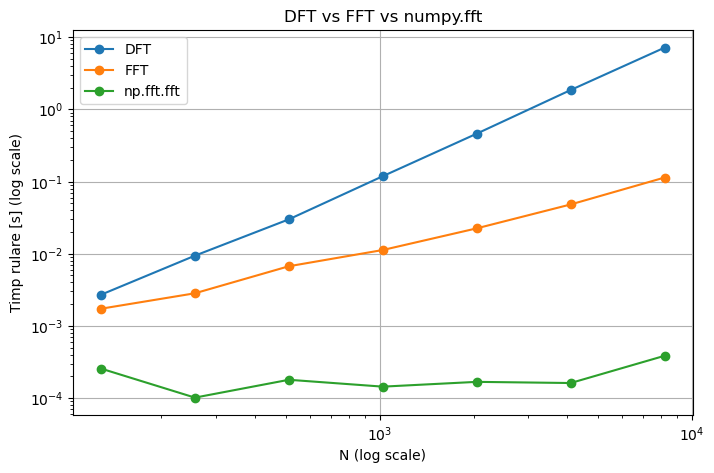

In [ ]:
# Ex 1 - DFT, FFT, numpy.fft
#----------------------------DFT---------------------------------------------
def F(N): #returneaza matricea Fourier de N x N
    
    #------------------------------------------------INEFICIENT---------------------------------------------------------
    # matr_fourier = np.zeros((N, N), dtype=complex)
    # for m in range(N):
    #     for k in range(N):
    #         matr_fourier[m, k] = math.e ** (-2j * np.pi * k * m / N)
    # return matr_fourier
    #------------------------------------------------INEFICIENT-----------------------------------------------------------
    
    #MAI BINE:
    # vector coloana 0...n-1, vector linie 0...n-1
    # le inmultesc si obtin toate combinatiile de m si k
    # apoi impart la 4, toata matr obt, ridic la e toata matricea obtinuta cu numpy oper.
    
    v = np.arange(N).reshape((N,1))
    v_t = np.arange(N).reshape((1, N))
    
    matr_fourier = v @ v_t
    
    matr_fourier = -2j*np.pi*matr_fourier/N
    matr_fourier = math.e ** matr_fourier
    
    return matr_fourier




def DFT(x):
    return F(len(x)) @ x

#----------------------------FFT---------------------------------------------
def FFT(x):
    N = x.size
    if N == 1:
        return x.copy() #FFT pt un singur esantion e chiar esantionul
    X_even = FFT(x[::2])
    X_odd = FFT(x[1::2]) #ma duc in recursie
    
    X = np.zeros(N, dtype=complex) #vector cu componentele Fourier m = 0,1,...,N-1
    
    for m in range(N//2):  #pe masura ce ma intorc din recursie, construiesc vectorul X de 2 ori mai mare decat anteriorul X pe baza X_even si X_odd de la pasul anterior
        factor_exp = math.e ** (-2j * np.pi * m / N) 
        X[m] = X_even[m] + factor_exp * X_odd[m]
        X[m + N//2] = X_even[m] - factor_exp * X_odd[m]
        
    return X

N = [128, 256, 512, 1024, 2048, 4096, 8192]

timpi_rulare_dft = []
timpi_rulare_fft = []
timpi_rulare_np_fft = []

for i in range(len(N)):
    x = np.random.rand(N[i])

    start = time.perf_counter()                      #DFT scris de mine
    DFT(x)
    stop = time.perf_counter()
    timpi_rulare_dft.append(stop - start)

    start = time.perf_counter()                      #FFT scris de mine
    FFT(x)
    stop = time.perf_counter()
    timpi_rulare_fft.append(stop - start)

    start = time.perf_counter()                      #fft din numpy
    np.fft.fft(x)
    stop = time.perf_counter()
    timpi_rulare_np_fft.append(stop - start)
    
plt.figure(figsize=(8,5))
plt.plot(N, timpi_rulare_dft, 'o-', label='DFT')
plt.plot(N, timpi_rulare_fft, 'o-', label='FFT')
plt.plot(N, timpi_rulare_np_fft, 'o-', label='np.fft.fft')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Timp rulare [s] (log scale)')
plt.title('DFT vs FFT vs numpy.fft')
plt.legend()
plt.grid(True)
plt.savefig("1_Timpi_rulare.pdf")
plt.show()

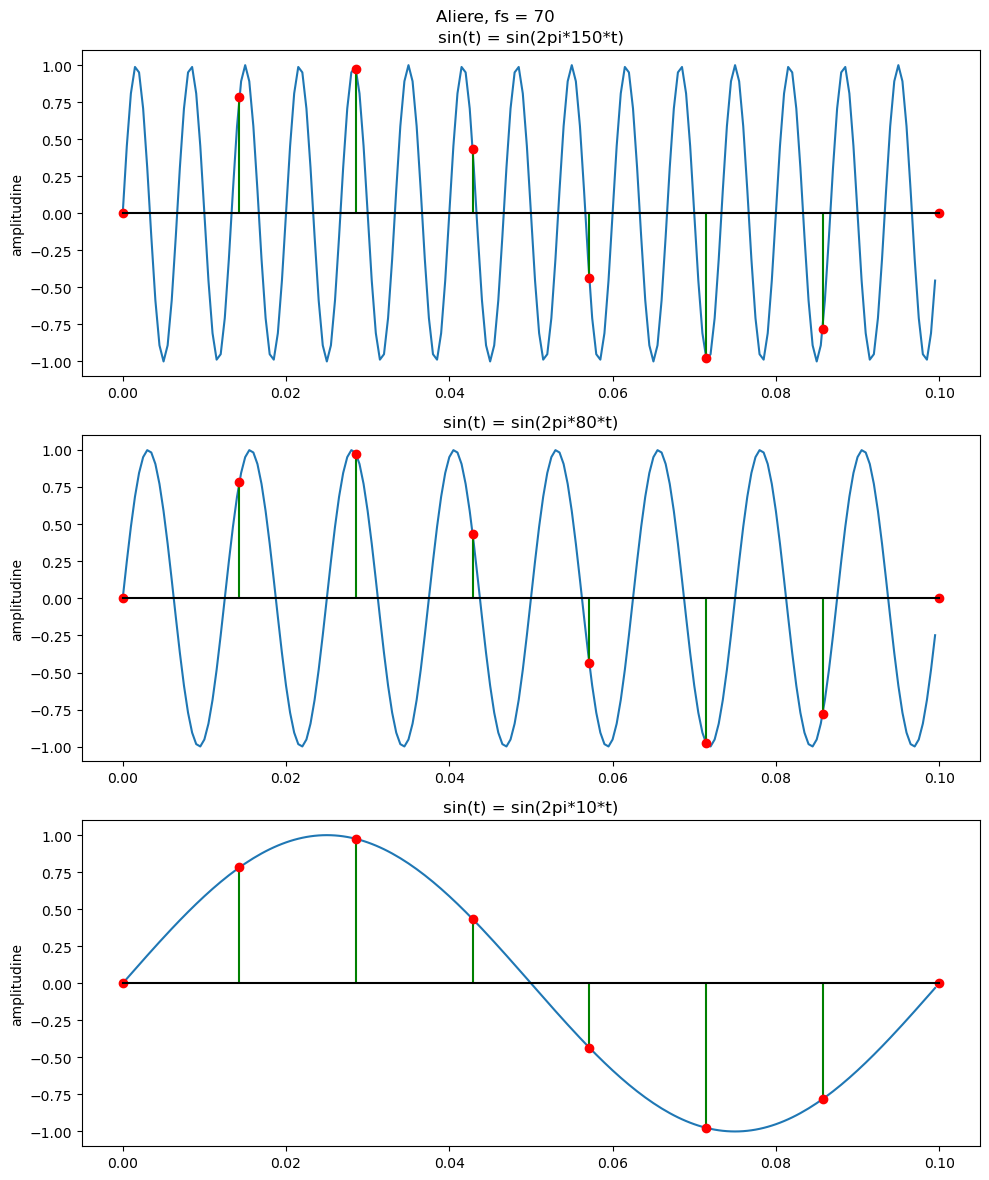

In [19]:
fs = 70

f1 = 150

#Aliere: frecventele f0 + k*fs pot produce aceleasi esantioane ca sinusoida cu frecventa f0

f2 = abs(f1 - fs) 
f3 = abs(f1 - 2*fs)   



def x1(t):
    return np.sin(2 * np.pi * f1 * t)

#frecv sub-Nyquist <=> fs < 2f_maxim ce apare in semnal

def x2(t):
    return np.sin(2 * np.pi * f2 * t)

def x3(t):
    return np.sin(2 * np.pi * f3 * t)


vector_esantioane = np.arange(0,0.1, 1/fs)


axa_reala = np.arange(0, 0.1, 0.0005) #0.25


fig, axs = plt.subplots(3, figsize = (10, 12)) #sharex=True
fig.suptitle(f"Aliere, fs = {fs}")
axs[0].plot(axa_reala, x1(axa_reala))
axs[0].set_title(f'sin(t) = sin(2pi*{f1}*t)')
axs[0].stem(vector_esantioane, x1(vector_esantioane), linefmt='green', markerfmt='ro', basefmt='k')

axs[1].plot(axa_reala, x2(axa_reala))
axs[1].set_title(f'sin(t) = sin(2pi*{f2}*t)')
axs[1].stem(vector_esantioane, x2(vector_esantioane), linefmt='green', markerfmt='ro', basefmt='k')

axs[2].plot(axa_reala, x3(axa_reala))
axs[2].set_title(f'sin(t) = sin(2pi*{f3}*t)')
axs[2].stem(vector_esantioane, x3(vector_esantioane), linefmt='green', markerfmt='ro', basefmt='k')

for ax in axs.flat:
    ax.set( ylabel='amplitudine')
    
plt.tight_layout(rect=[0, 0, 1, 1]) #colt stg jos -> dr sus available pt plotare

plt.savefig("2_Aliere.pdf")
plt.show()



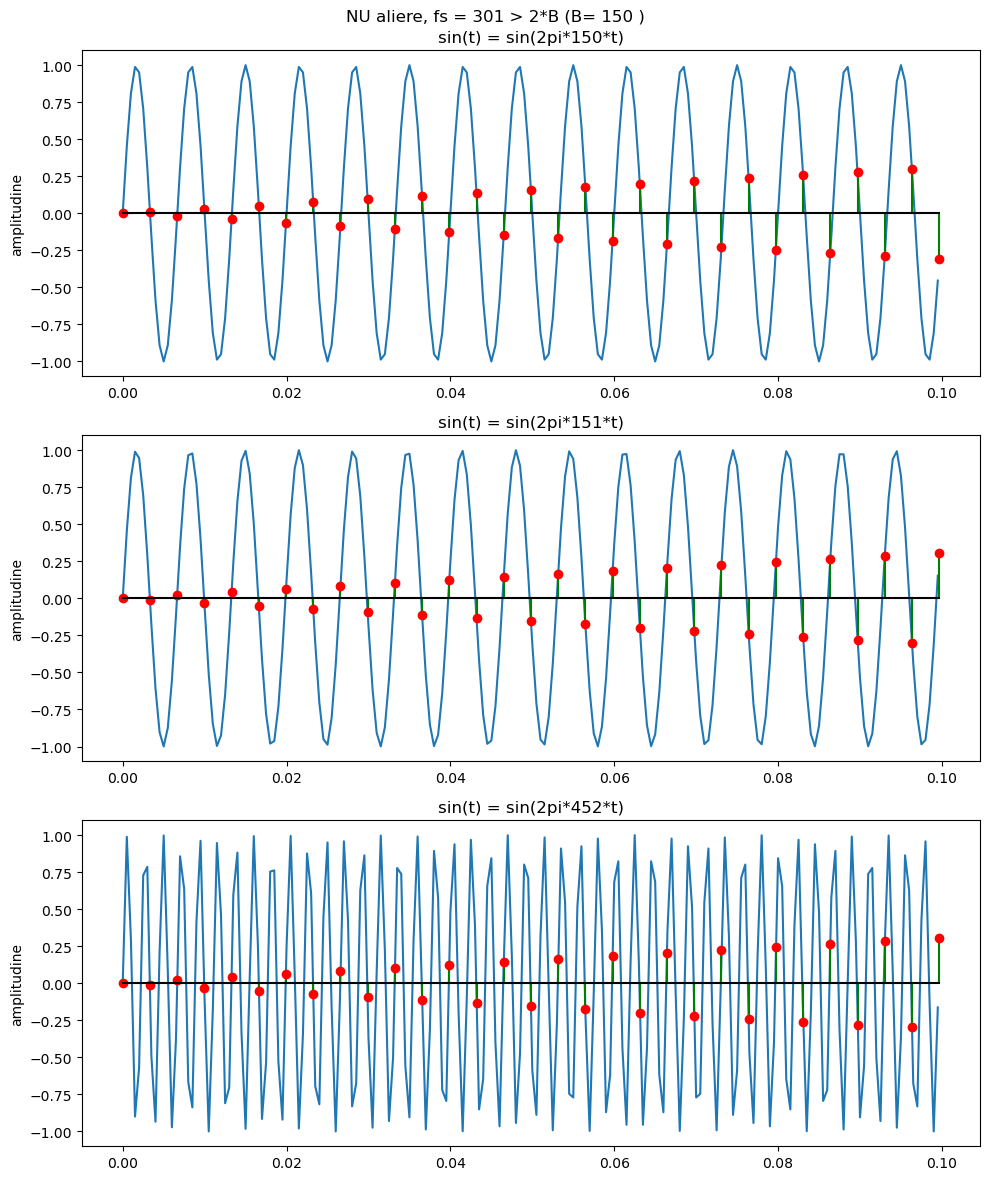

In [28]:
#Exercitiul 3

# Acum demonstrez ca alegand o fs > Nyquist (fs>2B), nu mai obtin fenomenul de aliere, pentru semnalul de la ex. precedent

fs = 301

f1 = 150

#Aliere: frecventele f0 + k*fs pot produce aceleasi esantioane ca sinusoida cu frecventa f0

f2 = abs(f1 - fs) 
f3 = abs(f1 - 2*fs)   



def x1(t):
    return np.sin(2 * np.pi * f1 * t)

#frecv sub-Nyquist <=> fs < 2f

def x2(t):
    return np.sin(2 * np.pi * f2 * t)

def x3(t):
    return np.sin(2 * np.pi * f3 * t)


vector_esantioane = np.arange(0,0.1, 1/fs)


axa_reala = np.arange(0, 0.1, 0.0005)


fig, axs = plt.subplots(3, figsize = (10, 12)) #sharex=True
fig.suptitle(f"NU aliere, fs = {fs} > 2*B (B= {f1} )")
axs[0].plot(axa_reala, x1(axa_reala))
axs[0].set_title(f'sin(t) = sin(2pi*{f1}*t)')
axs[0].stem(vector_esantioane, x1(vector_esantioane), linefmt='green', markerfmt='ro', basefmt='k')

axs[1].plot(axa_reala, x2(axa_reala))
axs[1].set_title(f'sin(t) = sin(2pi*{f2}*t)')
axs[1].stem(vector_esantioane, x2(vector_esantioane), linefmt='green', markerfmt='ro', basefmt='k')

axs[2].plot(axa_reala, x3(axa_reala))
axs[2].set_title(f'sin(t) = sin(2pi*{f3}*t)')
axs[2].stem(vector_esantioane, x3(vector_esantioane), linefmt='green', markerfmt='ro', basefmt='k')

for ax in axs.flat:
    ax.set( ylabel='amplitudine')
    
plt.tight_layout(rect=[0, 0, 1, 1]) #colt stg jos -> dr sus available pt plotare

plt.savefig("3_nu_aliere.pdf")
plt.show()




#4.

frecventele emise contrabas -> [40 Hz, 200Hz]

Frecv min. cu care tb. esantionat semnalul trece-banda?

fs > 2B 
B = 200 Hz

=> fs > 400 Hz

In [ ]:
#5 -> vezi 5_spectograma_a_e_i_o_u.png

[[6.00000000e+00 3.68545132e+00 1.78237544e+00 ... 2.77336847e+02
  1.81202028e+02 4.94000000e+02]
 [7.00000000e+00 4.13175744e+00 2.80613629e+00 ... 2.30004760e+02
  3.59942028e+02 1.77000000e+02]
 [4.00000000e+00 2.10224204e+00 4.63500163e+00 ... 2.37170367e+02
  1.44813689e+02 7.20000000e+02]
 ...
 [1.50780000e+04 2.19613568e+04 8.70770387e+03 ... 2.78803377e+02
  2.65270876e+02 3.24000000e+02]
 [8.88900000e+03 1.96326439e+04 1.85797848e+04 ... 1.74152436e+02
  1.76920198e+02 6.83000000e+02]
 [4.28000000e+03 8.82152618e+03 5.97666803e+03 ... 1.63081330e+02
  2.56809150e+02 2.32000000e+02]]
(199, 1791)
[[6.00000000e+00 7.00000000e+00 4.00000000e+00 ... 1.50780000e+04
  8.88900000e+03 4.28000000e+03]
 [3.68545132e+00 4.13175744e+00 2.10224204e+00 ... 2.19613568e+04
  1.96326439e+04 8.82152618e+03]
 [1.78237544e+00 2.80613629e+00 4.63500163e+00 ... 8.70770387e+03
  1.85797848e+04 5.97666803e+03]
 ...
 [2.77336847e+02 2.30004760e+02 2.37170367e+02 ... 2.78803377e+02
  1.74152436e+02 1.6

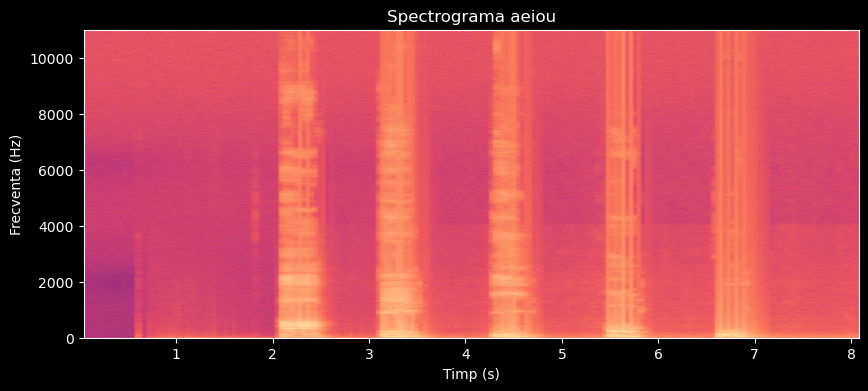

In [76]:
#6
#fac eu spectograma



#a. citesc semnalul audio din fisier
#fs, x = wavfile.read(r"C:\Users\crist\Documents\FACULTATE\ANUL 3\SEMNALE\LAB\LAB 4\aeiou.wav")
fs, x = wavfile.read(r"C:\Users\crist\Documents\FACULTATE\ANUL 3\SEMNALE\LAB\LAB 4\a_e_i_o_u.wav")

N = len(x) #dimensiune vector
lungime_grup = int(0.01 * N)  #gruprui de lungime 1% din lungimea semnalului



#b. grupez cate 1% din valorile semnalului impreuna a.i. sa fie si o suprapunere de 50% intre grupuri
grupuri = []
for i in range(0, N - lungime_grup, lungime_grup//2): #lungime_grup // 2 imi face suprapunerea de 50% intre grupuri
    grup = x[i : i + lungime_grup]
    grupuri.append(grup)

grupuri = np.array(grupuri)

#c,d. pentru fiecare grup => calculez FFT

fft_uri = np.array([np.fft.rfft(grupuri[i]) for i in range(len(grupuri)) ]) #vector ce contine fft urile grupurilor
# print(fft_uri)
# print(fft_uri.shape)

fft_uri = np.abs(fft_uri) #modul pe fiecare componenta din fiecare fft al unui grup
print(fft_uri)
print(fft_uri.shape)

fft_uri = fft_uri.T #transpun pt ca fiecare fft sa reprezinte o coloana
print(fft_uri)
print(fft_uri.shape)


#ca sa afisez timpul pe Ox, nu indicele grupului:

#timp[esantion] = idx_esantion * ts = idx_esantion / fs
#timp_central_grup = (lungime_grup//2  + idx_grup * lungime_grup//2) /fs


idx_grup = np.arange(len(grupuri))
timp_central = (lungime_grup//2 + idx_grup * (lungime_grup//2)) / fs


plt.figure(figsize=(10, 4))
plt.imshow(10 * np.log10(fft_uri + 1e-6), aspect='auto', origin='lower', 
        #extent=[0, len(grupuri), 0, fs/2], 
        extent = [timp_central[0], timp_central[-1], 0, fs/4], # fs/2 e cea mai mare frecv pe care o pot prinde, dar de la fs/4 -> fs/2 = oglinda fata de prima jumatate
        cmap='magma')  
# plt.ylim(0, 3000)
plt.xlabel("Timp (s)")
plt.ylabel("Frecventa (Hz)")
plt.title("Spectrograma aeiou")
plt.savefig("6_Spectograma_aeiou.pdf")
plt.show()



#7.

P_semnal = 90dB

SNR_dB = 80 dB

----------------------

P_zgomot = ?


Rez:

    SNR_dB = 10 log_10 (SNR)

=>  10 ^ SNR_dB = SNR ^ 10

=>  SNR = rad de ord 10 din (10^SNR_dB) = (10^SNR_dB) ^ 0.1 = 10 ^ (SNR_dB * 0.1) = 10 ^ (80 * 0.1) = 10 ^ 8


Iar SNR = P_semnal / P_zgomot

=> P_zgomot = P_semnal / SNR = 90 / (10 ^ 8) = 9 * 10^-7 dB



In [30]:
P_semnal = 90
SNR_dB = 80

SNR = (10**SNR_dB)**0.1 # rad de ord 10

P_zgomot = P_semnal / SNR

print(P_zgomot)

8.999999999999991e-07
